# Lösung mit Library (V)

Wir sehen uns an, wie man mit "Einkaufsteilen" (Bibliotheken) sehr schnell Programme erstellen kann. Eine wichtige Regel in der Softwareentwicklung ist: "Do not reinvent the wheel!" Das heißt: Nutzen Sie Einkaufsteile, die gut getestet sind und gewartet werden! Eine Sammlung von Einkaufsteilen wird in der Softwareentwicklung als **Library** bezeichnet. Konkret sehen wir uns an, wie Julia das Fallbeispiel mithilfe einer Library lösen kann.


```{admonition} Hinweis
:class: remark

Sie führen den Code gerade auf einem Server aus. Deshalb können Sie **nicht** einfach Dateien von Ihrem Rechner hochladen oder von Ihrem Rechner-Pfad einlesen. Die Messdaten-Datei ist bereits auf dem Server für Sie abgelegt. 
```

Bitte führen Sie den folgendenen Code nochmals aus, um in Ihrem Setup den Pfad zur Datei zu identifizieren. Verwenden Sie die Variable `csv_file_path` um auf die Datei zuzugreifen:

In [1]:
csv_file_path = "https://raw.githubusercontent.com/fk03ingenieursinformatik/ingenieurinformatik-buch-deploy/refs/heads/master/data/air_quality_no2.csv"

print(f"Die Datei wird bezogen über: {csv_file_path}")

Die Datei wird bezogen über: https://raw.githubusercontent.com/fk03ingenieursinformatik/ingenieurinformatik-buch-deploy/refs/heads/master/data/air_quality_no2.csv


Als erstes liest Julia die Messdaten aus der CSV-Datei ein und werfen einen Blick auf die Tabelle.

In [2]:
import pandas as pd

df = pd.read_csv(
    csv_file_path,
    parse_dates=["datetime"]
)

df = df.rename(
    columns={
        "station_antwerp": "Antwerp",
        "station_paris": "Paris",
        "station_london": "London",
    }
)

df.head()

,datetime,Antwerp,Paris,London
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


Als Nächstes bereiten wir die Daten so vor, dass Zeitpunkte bequem als Index genutzt werden können.

In [3]:
df = df.set_index("datetime")
df.head()

,Antwerp,Paris,London
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


Nun lassen wir uns zentrale Kennwerte (z. B. Mittelwert, Standardabweichung und Perzentile) automatisch berechnen.

In [4]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Antwerp,95.0,25.778947,12.682019,7.5,16.75,23.00,34.500,74.5
Paris,1004.0,27.740538,15.285746,0.0,16.50,24.15,35.925,97.0
London,969.0,24.777090,11.214377,0.0,19.00,25.00,31.000,97.0


Zum Abschluss visualisieren wir die Verteilung der Messwerte als Histogramme.

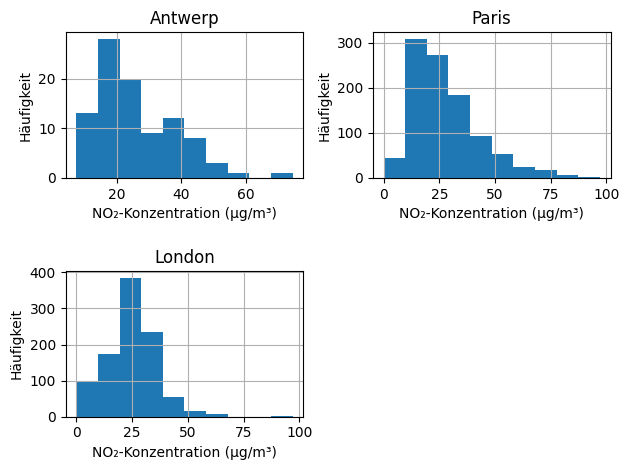

In [5]:
import matplotlib.pyplot as plt

axs = df.hist()
for ax in axs.ravel():
    ax.set_xlabel("NO₂-Konzentration (µg/m³)")
    ax.set_ylabel("Häufigkeit")

plt.tight_layout(h_pad=2.0, w_pad=1.0)
plt.show()

Und wir sind fertig!